<a href="https://colab.research.google.com/github/juanmanuelvillacis/Proyecto_final/blob/main/Proyecto_final__all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project Iron Hack Bootcamp Data Analyst

# Juan Manuel Villacís

English Colab Notebook
Starte with 404 Unique Series, 217 countries in a data frame of 20 years

In [1]:

#!pip install hdbscan
#import hdbscan

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn.cluster as cluster 

import scipy.cluster.hierarchy as hierarchy
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans, DBSCAN
sns.set_context('poster')

In [3]:
d = pd.read_csv('/content/drive/MyDrive/Iron Hack/Proyectos/Final/CSV_Files/IH Final Project_all/8dc16553-88de-4f34-b797-b781e897cb9b_Data.csv')


In [4]:
df_ods = pd.read_csv('/content/drive/MyDrive/Iron Hack/Proyectos/Final/CSV_Files/IH Final Project_all/Series con ODS.csv',header=None)
df_ods

,0,1,2
0,Coverage of social insurance programs (% of po...,1,per_si_allsi.cov_pop_tot
1,Coverage of social insurance programs in 2nd q...,1,per_si_allsi.cov_q2_tot
2,Coverage of social insurance programs in 3rd q...,1,per_si_allsi.cov_q3_tot
3,Coverage of social insurance programs in 4th q...,1,per_si_allsi.cov_q4_tot
4,Coverage of social insurance programs in poore...,1,per_si_allsi.cov_q1_tot
...,...,...,...
383,"Tariff rate, applied, weighted mean, manufactu...",17,TM.TAX.MANF.WM.AR.ZS
384,"Tariff rate, applied, weighted mean, primary p...",17,TM.TAX.TCOM.WM.AR.ZS
385,Tax revenue (% of GDP),17,GC.TAX.TOTL.GD.ZS
386,tax revenue (current LCU),17,GC.TAX.TOTL.CN


In [5]:
d.drop(index=[87668,87669,87670,87671,87672],inplace=True)

In [6]:
d.rename(columns={'2000 [YR2000]': '2000','2001 [YR2001]': '2001','2002 [YR2002]': '2002','2003 [YR2003]': '2003','2004 [YR2004]': '2004','2005 [YR2005]': '2005', '2007 [YR2007]': '2007',
       '2009 [YR2009]': '2009', '2011 [YR2011]': '2011',
       '2013 [YR2013]': '2013', '2015 [YR2015]': '2015',
       '2017 [YR2017]': '2017', '2019 [YR2019]': '2019', '2006 [YR2006]': '2006', '2008 [YR2008]':
       '2008', '2010 [YR2010]': '2010', '2012 [YR2012]':
       '2012', '2014 [YR2014]': '2014', '2016 [YR2016]':
       '2016', '2018 [YR2018]': '2018'},inplace=True)

In [7]:
d.replace('..',np.nan,inplace=True)

In [8]:
df = pd.merge(left=d,right=df_ods,how='left',left_on='Series Code',right_on=2)

In [9]:
df.drop(columns=[0,2],inplace=True)
df.rename(columns={1:'ODS'}, inplace=True)

In [10]:
time_series = ['2000', '2001','2002','2003', '2004','2005','2006', '2007', '2008','2009', '2010', '2011', '2012', '2013', '2014','2015', '2016','2017','2018','2019']

In [11]:
for c in time_series:
  df[c] = pd.to_numeric(df[c],errors='coerce')

In [12]:
ods_nul=df[df['ODS'].isnull()==True]['Series Name'].unique()

In [13]:
ods_complete = df[df['ODS'].isnull()==False]['Series Code'].unique()

In [14]:
df['Count']=df.loc[:,time_series].count(axis = 1)

In [15]:
df['CS_code'] = df['Country Code'] + '-'+ df['Series Code']

In [16]:
df.drop(index=df[df['ODS'].isnull()==True]['Series Name'].index.values,inplace=True)

In [17]:
df.reset_index(inplace=True)

##Selection of series with most data
A selection of the series containing 2 or more values per series in at least 90% of countries was made. This because is the minimun data for interpolate the rest of the info
- len(series_to_keep) = 40

In [18]:
ser_dict = dict.fromkeys(df['Series Code'].unique())
l1 = []
l2=[]
c=0
for v in range(len(df)):
  if df.loc[v,'Count']<=2:
    try:
      ser_dict[df.loc[v,'Series Code']] +=1
    except:
      ser_dict[df.loc[v,'Series Code']] =1

In [19]:
series_clean = pd.DataFrame(ser_dict,index=[0])
series_clean = series_clean.T

In [20]:
series_clean[series_clean[0]>200]

,0
SI.SPR.PC40.ZG,217
EN.CLC.DRSK.XQ,217
EN.CLC.MDAT.ZS,217
SH.STA.WASH.P5,217
EN.HPT.THRD.NO,217
SG.VAW.1549.ZS,217
SG.DMK.SRCR.FN.ZS,209
SI.SPR.PCAP.ZG,217
EN.BIR.THRD.NO,217
EN.FSH.THRD.NO,217


In [21]:
series_clean[series_clean[0]<20]

,0
EG.ELC.ACCS.ZS,1
BX.KLT.DINV.WD.GD.ZS,19
NY.GDP.PCAP.KD.ZG,7
IT.NET.USER.ZS,9
NV.IND.MANF.ZS,17
SH.H2O.BASW.ZS,2
SH.STA.BASS.ZS,4
ER.PTD.TOTL.ZS,7
NY.GDP.TOTL.RT.ZS,7
EG.ELC.ACCS.RU.ZS,4


In [22]:
series_to_keep = list(series_clean[series_clean[0]<20].index)

In [23]:
series_to_keep.append(series_clean[series_clean[0].isnull()].index[0])

In [24]:
ser_clean = {k: v for k, v in ser_dict.items() if v is not None}


In [25]:
df[(df['Count']<=2)]['ODS'].value_counts().sum()/len(df)

0.3967765689581453

In [26]:
df[(df['Count']<=2)]['ODS'].value_counts()

4.0     7338
1.0     5297
8.0     3433
3.0     3150
17.0    2829
2.0     2221
5.0     2071
6.0     1973
16.0    1557
10.0     942
15.0     889
9.0      752
13.0     434
11.0     244
12.0     131
14.0      82
7.0       64
Name: ODS, dtype: int64

In [27]:
df_reduce = df[df['Series Code'].isin(series_to_keep)]

In [28]:
df_reduce.reset_index(inplace=True,drop=True)

In [29]:
len(df_reduce[df_reduce['Count']==0])/len(df_reduce)

0.03282005170282118

In [30]:
coun_dict = dict.fromkeys(df['Country Code'].unique())
l1 = []
l2=[]
c=0
for v in range(len(df)):
  if df.loc[v,'Count']>=15:
    try:
      coun_dict[df.loc[v,'Country Code']] +=1
    except:
      coun_dict[df.loc[v,'Country Code']] =0

In [31]:
coun_clean = pd.DataFrame(coun_dict,index=[0])
coun_clean = coun_clean.T

In [32]:
countries_to_keep = coun_clean[coun_clean[0]>200].index

In [33]:
len(countries_to_keep)

2

In [34]:
series_sum = dict.fromkeys(df['Series Code'].unique())

In [35]:
for s in df['Series Code'].unique():
  series_sum[s]=df[df['Series Code']== s][time_series].count().sum()
  

In [36]:
df[df['Series Code']== 'SP.ADO.TFRT']

,index,Country Name,Country Code,Series Name,Series Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,ODS,Count,CS_code
3,3,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,153.9510,150.1920,146.433,143.7648,141.0966,138.4284,135.7602,133.092,126.6330,120.1740,113.7150,107.2560,100.797,94.4290,88.0610,81.6930,75.3250,68.957,65.1410,61.3250,3.0,20,AFG-SP.ADO.TFRT
391,408,Albania,ALB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,19.0372,18.9396,18.842,18.7650,18.6880,18.6110,18.5340,18.457,18.9116,19.3662,19.8208,20.2754,20.730,20.5124,20.2948,20.0772,19.8596,19.642,19.5724,19.5028,3.0,20,ALB-SP.ADO.TFRT
779,813,Algeria,DZA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,11.7556,10.7178,9.680,9.6814,9.6828,9.6842,9.6856,9.687,10.0608,10.4346,10.8084,11.1822,11.556,11.2590,10.9620,10.6650,10.3680,10.071,9.8338,9.5966,3.0,20,DZA-SP.ADO.TFRT
1167,1218,American Samoa,ASM,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,ASM-SP.ADO.TFRT
1555,1623,Andorra,AND,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,AND-SP.ADO.TFRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82259,85863,Virgin Islands (U.S.),VIR,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,55.4724,52.4602,49.448,49.4754,49.5028,49.5302,49.5576,49.585,48.8174,48.0498,47.2822,46.5146,45.747,42.3750,39.0030,35.6310,32.2590,28.887,27.6482,26.4094,3.0,20,VIR-SP.ADO.TFRT
82647,86268,West Bank and Gaza,PSE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,81.1304,75.8392,70.548,69.6038,68.6596,67.7154,66.7712,65.827,64.8200,63.8130,62.8060,61.7990,60.792,59.1868,57.5816,55.9764,54.3712,52.766,51.8828,50.9996,3.0,20,PSE-SP.ADO.TFRT
83035,86673,"Yemen, Rep.",YEM,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,95.8560,90.7030,85.550,83.7600,81.9700,80.1800,78.3900,76.600,74.8144,73.0288,71.2432,69.4576,67.672,66.2080,64.7440,63.2800,61.8160,60.352,59.1624,57.9728,3.0,20,YEM-SP.ADO.TFRT
83423,87078,Zambia,ZMB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,159.9716,159.8588,159.746,157.5886,155.4312,153.2738,151.1164,148.959,146.5064,144.0538,141.6012,139.1486,136.696,133.3792,130.0624,126.7456,123.4288,120.112,118.3048,116.4976,3.0,20,ZMB-SP.ADO.TFRT


In [37]:
217*20

4340

In [38]:
df_series = pd.DataFrame(series_sum, index=[0])

In [39]:
df_series=df_series.T

In [40]:
df_series.describe()

,0
count,387.000000
mean,1893.242894
std,1415.204602
min,0.000000
25%,581.500000
50%,1685.000000
75%,3273.500000
max,5682.000000


In [41]:
# New df with filtered series
#series_to_keep = df_series[df_series[0]>2170].index

In [42]:
len(df_series[df_series[0]>2170].index)

173

## Interpolation
The null values from rows with at least 2 values within the 10 years time lapse will be filled with interpolation 

In [43]:
from scipy.interpolate import interp1d

In [44]:
df_14_notnull = df_reduce[(df_reduce['Count']>=2)].copy()
#df_14_notnull.drop(columns=['ODS','Sub ODS'],inplace=True)
df_14_notnull.reset_index(inplace=True,drop=True)

In [45]:
df['Count'].value_counts()

0     23772
20    18884
1      6362
3      4319
19     4025
4      3915
18     3536
2      3273
5      2079
10     1929
16     1900
6      1503
17     1181
13     1075
9      1044
15     1007
14      946
8       904
7       898
12      855
11      789
Name: Count, dtype: int64

In [46]:
import time

In [47]:
x = list()
y = list()
program_starts = time.time()
time_series = ['2000', '2001','2002','2003', '2004','2005','2006', '2007', '2008','2009', '2010', '2011', '2012', '2013', '2014','2015', '2016','2017','2018','2019']
time_series_extra = time_series
time_series_extra.append('CS_code')
time_series_extra.append('ODS')
x_new = np.arange(2000,2020,1)
interpol = dict.fromkeys(range(len(df_14_notnull)))
for r in range(len(df_14_notnull)):
  if df_14_notnull.loc[r,'Count'] == 20:
    interpol[r]= df_14_notnull.loc[r,time_series_extra]
    #print('ok')
  else:
    for i,a in enumerate(df_14_notnull.iloc[r,5:-3].notnull()):
      if a == True:
        year= float(df_14_notnull.iloc[r,5:-3].notnull().index[i])
        val= df_14_notnull.iloc[r,i+5]
        x.append(year)
        y.append(val)    

    f = interp1d(x, y, kind='linear', fill_value='extrapolate')  
    interpol[r] = np.append(f(x_new),list(df_14_notnull.iloc[r,[-1,-3]]))
    x=[]
    y=[]
end_time = time.time()
print("total time taken this loop: ", end_time - program_starts)

total time taken this loop:  30.027270078659058


In [48]:
df_interpol = pd.DataFrame(data=interpol)
df_interpol = df_interpol.T


In [49]:
df_interpol.rename(columns={'2000':'2000i', '2001':'2001i', '2002': '2002i', '2003':'2003i', '2004':'2004i', '2005': '2005i', '2006': '2006i','2007':'2007i', '2008':'2008i',
                            '2009':'2009i','2010':'2010i', '2011':'2011i', '2012':'2012i', '2013': '2013i', '2014':'2014i','2015':'2015i','2016':'2016i','2017':'2017i','2018':'2018i','2019':'2019i'},inplace=True)

In [50]:
time_series_i = ['2000i','2001i','2002i', '2003i','2004i','2005i','2006i', '2007i','2008i', '2009i', '2010i','2011i','2012i','2013i',
                            '2014i','2015i','2016i', '2017i', '2018i', '2019i']

In [51]:
for c in time_series_i:
  df_interpol[c] = pd.to_numeric(df_interpol[c],errors='coerce')

In [52]:
 #Se crea códido para merge entre interpolación y antiguo df
#df_interpol['CS_code'] = df_14_notnull['Country Code'] + '-' + df_14_notnull['Series Code']


In [53]:
df_clean = pd.merge(left=df_reduce,right=df_interpol.drop(columns='ODS'),how='left',left_on='CS_code',right_on='CS_code')

In [54]:
#Drop rows thaht doesnt have ODS values
df_clean.drop(index=df_clean[df_clean['ODS'].isnull()==True].index,inplace=True)

In [55]:
df_clean.fillna(0,inplace=True)

In [56]:
#Conteo de datos no nulos por país
series_vals = dict.fromkeys(df['Series Name'].unique())
for i,c in enumerate(df['Series Name']):
  try:
    series_vals[c]+= df['Count'][i]
  except:
    series_vals[c] = df['Count'][i]

In [57]:
#df_clean.to_csv('df_clean.csv',)

In [58]:
interp= df_clean[df_clean['Count']==3][time_series].values
interp_i = df_clean[df_clean['Count']==3][time_series_i]
years = range(20)

In [59]:
df_clean['mean_i'] = df_clean[time_series_i].mean(axis=1)

In [60]:
df_clean

,index,Country Name,Country Code,Series Name,Series Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,ODS,Count,CS_code,2000i,2001i,2002i,2003i,2004i,2005i,2006i,2007i,2008i,2009i,2010i,2011i,2012i,2013i,2014i,2015i,2016i,2017i,2018i,2019i,mean_i
0,0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.229527e+01,2.809996e+01,3.390160e+01,4.240000e+01,4.552068e+01,4.270000e+01,4.322202e+01,6.910000e+01,6.898294e+01,8.950000e+01,7.150000e+01,9.770000e+01,9.770000e+01,9.871562e+01,9.770000e+01,7.0,15,AFG-EG.ELC.ACCS.ZS,-6.728197e+00,-9.235039e-01,4.881189e+00,1.068588e+01,1.649058e+01,2.229527e+01,2.809996e+01,3.390160e+01,4.240000e+01,4.552068e+01,4.270000e+01,4.322202e+01,6.910000e+01,6.898294e+01,8.950000e+01,7.150000e+01,9.770000e+01,9.770000e+01,9.871562e+01,9.770000e+01,4.867220e+01
1,17,Afghanistan,AFG,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.000000e+00,0.000000e+00,1.232991e+00,1.280019e+00,3.575816e+00,4.364535e+00,3.414004e+00,1.935703e+00,4.553637e-01,4.510560e-01,1.203125e+00,2.930384e-01,2.840956e-01,2.349651e-01,2.097901e-01,8.496793e-01,5.194396e-01,2.731004e-01,6.507349e-01,1.213230e-01,17.0,18,AFG-BX.KLT.DINV.WD.GD.ZS,1.138936e+00,1.185963e+00,1.232991e+00,1.280019e+00,3.575816e+00,4.364535e+00,3.414004e+00,1.935703e+00,4.553637e-01,4.510560e-01,1.203125e+00,2.930384e-01,2.840956e-01,2.349651e-01,2.097901e-01,8.496793e-01,5.194396e-01,2.731004e-01,6.507349e-01,1.213230e-01,1.183684e+00
2,18,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.000000e+00,0.000000e+00,0.000000e+00,3.868380e+00,-2.875203e+00,7.207967e+00,2.253311e+00,1.102279e+01,1.594215e+00,1.851542e+01,1.126409e+01,-2.681061e+00,8.974865e+00,1.974166e+00,-6.652911e-01,-1.622857e+00,-5.414162e-01,6.476420e-02,-1.194900e+00,1.535637e+00,8.0,17,AFG-NY.GDP.PCAP.KD.ZG,2.409913e+01,1.735555e+01,1.061196e+01,3.868380e+00,-2.875203e+00,7.207967e+00,2.253311e+00,1.102279e+01,1.594215e+00,1.851542e+01,1.126409e+01,-2.681061e+00,8.974865e+00,1.974166e+00,-6.652911e-01,-1.622857e+00,-5.414162e-01,6.476420e-02,-1.194900e+00,1.535637e+00,5.538076e+00
3,22,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,0.000000e+00,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,0.000000e+00,1.144769e+01,0.000000e+00,0.000000e+00,17.0,16,AFG-IT.NET.USER.ZS,4.883741e-03,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,9.853844e+00,1.144769e+01,1.304153e+01,1.463538e+01,4.771106e+00
4,25,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,0.000000e+00,0.000000e+00,1.882275e+01,1.692387e+01,1.755401e+01,1.659821e+01,1.638554e+01,1.774731e+01,1.783912e+01,1.314988e+01,1.252258e+01,1.377919e+01,1.248609e+01,1.149987e+01,1.147759e+01,1.142001e+01,4.114197e+00,3.530422e+00,6.160177e+00,7.043181e+00,9.0,18,AFG-NV.IND.MANF.ZS,2.262052e+01,2.072164e+01,1.882275e+01,1.692387e+01,1.755401e+01,1.659821e+01,1.638554e+01,1.774731e+01,1.783912e+01,1.314988e+01,1.252258e+01,1.377919e+01,1.248609e+01,1.149987e+01,1.147759e+01,1.142001e+01,4.114197e+00,3.530422e+00,6.160177e+00,7.043181e+00,1.361981e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,87845,Zimbabwe,ZWE,Terrestrial protected areas (% of total land a...,ER.LND.PTLD.ZS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

##Estandarization
Estandarize interpolated values by creating pivot tables for each ODS with the unique or multiple series

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
df_clean['SO_code'] = [df_clean.loc[i,'Series Code']+'-'+ str(round(df_clean.loc[i,'ODS'])) for i in range(len(df_clean))]

In [74]:
df_clean['SO_code'][0]

'EG.ELC.ACCS.ZS-7'

In [75]:
df_pivot_all = pd.pivot_table(data=df_clean,values='mean_i',index='Country Name',columns='SO_code')

In [76]:
df_pivot_all

SO_code,AG.LND.FRST.K2-15,AG.LND.FRST.ZS-15,BX.KLT.DINV.CD.WD-17,BX.KLT.DINV.WD.GD.ZS-17,EG.ELC.ACCS.RU.ZS-7,EG.ELC.ACCS.UR.ZS-7,EG.ELC.ACCS.ZS-7,EG.ELC.RNEW.ZS-7,EG.FEC.RNEW.ZS-7,ER.FSH.CAPT.MT-14,ER.FSH.PROD.MT-14,ER.LND.PTLD.ZS-15,ER.PTD.TOTL.ZS-15,IT.NET.USER.ZS-17,NV.IND.MANF.CD-9,NV.IND.MANF.ZS-9,NY.GDP.COAL.RT.ZS-12,NY.GDP.FRST.RT.ZS-12,NY.GDP.MINR.RT.ZS-12,NY.GDP.MKTP.CD-17,NY.GDP.MKTP.CN-17,NY.GDP.MKTP.KD-17,NY.GDP.MKTP.KD.ZG-8,NY.GDP.MKTP.KN-17,NY.GDP.MKTP.PP.CD-17,NY.GDP.NGAS.RT.ZS-12,NY.GDP.PCAP.KD.ZG-8,NY.GDP.PETR.RT.ZS-12,NY.GDP.TOTL.RT.ZS-12,PA.NUS.ATLS-17,SE.PRE.DURS-4,SE.PRM.DURS-4,SE.SEC.DURS-4,SH.H2O.BASW.ZS-6,SH.STA.BASS.ZS-6,SH.STA.ODFC.ZS-6,SH.TBS.INCD-3,SP.URB.GROW-11,SP.URB.TOTL-11,SP.URB.TOTL.IN.ZS-11,TG.VAL.TOTL.GD.ZS-17
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,12084.400000,1.850994,9.717753e+07,1.183684,38.732193,81.965250,48.672202,79.825715,27.717966,1295.000000,4277.500000,0.068698,0.104707,4.771106,1.456655e+09,13.619806,0.181757,0.484085,0.000506,1.275758e+10,7.308747e+11,1.417782e+10,9.215349,8.580605e+11,4.675692e+10,0.033579,5.538076,0.018319,0.718246,55.852225,1.000,6.00,6.00,47.971956,33.873375,18.849157,189.0500,3.963151,7006040.50,23.70295,46.544388
Albania,7810.058750,28.503864,7.879960e+08,6.934573,100.000000,99.995000,99.980500,98.692162,37.270196,6138.625000,9012.024988,13.711466,10.634494,35.388972,5.479309e+08,5.082717,0.005858,0.117450,0.099496,1.034705e+10,1.117420e+12,1.115053e+10,4.255355,1.158950e+12,2.578689e+10,0.022406,4.705717,1.345404,1.590613,111.500275,3.700,4.55,7.45,88.906168,94.473593,0.369732,18.2000,1.557471,1515231.10,51.53760,49.781414
Algeria,18341.750000,0.770099,1.439568e+09,1.094360,98.844064,100.712709,100.085876,0.550760,0.266338,118161.927734,120039.420703,7.532851,7.105545,18.975067,4.990293e+10,37.006037,0.000000,0.130793,0.080955,1.409717e+11,1.206767e+13,1.598917e+11,3.280000,1.511045e+13,4.254651e+11,3.105651,1.538753,21.240587,24.557987,83.796000,1.325,5.45,6.65,92.110636,86.191899,2.849726,73.5500,2.770891,24392800.30,66.94180,56.783690
American Samoa,174.450000,87.225000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.418990,0.418990,4169.250000,4185.500000,-72.722002,8.635081,0.000000,8.890000e+07,15.443323,0.000000,0.000000,0.000000,5.789000e+08,5.789000e+08,5.780105e+08,-0.513863,6.748500e+08,0.000000e+00,0.000000,-0.412876,0.000000,0.000000,1.000000,0.000,6.00,0.00,99.193765,61.038797,0.718076,6.5700,-0.210732,50129.80,87.72605,155.898195
Andorra,160.000000,34.042553,0.000000e+00,0.000000,100.000000,100.000000,100.000000,88.074812,18.050135,0.000000,0.000000,-15.635870,-15.628753,63.392694,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.005556e+09,2.453849e+09,3.384774e+09,1.750760,2.553135e+09,0.000000e+00,0.000000,0.798857,0.000000,0.000000,0.843890,3.000,6.00,6.00,99.999998,99.999998,0.000000,9.8000,0.646193,69734.55,89.46545,55.352544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),193.215000,55.204286,0.000000e+00,0.000000,100.000000,100.000000,100.000000,1.816553,1.816553,1126.050000,1132.432001,20.262082,1.044619,38.794564,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.916800e+09,3.916800e+09,3.813020e+09,-1.774981,3.726900e+09,0.000000e+00,0.000000,-1.699597,0.000000,0.000000,1.000000,0.000,6.00,0.00,98.718304,99.185904,0.000000,0.0000,0.101989,102017.40,94.39635,0.000000
West Bank and Gaza,91.565001,1.521013,1.149572e+08,1.081929,97.965495,99.851754,99.351159,0.000000,15.742903,2432.250000,2643.900000,8.359252,0.000000,33.386698,1.058110e+09,10.884074,0.000000,0.000000,0.000000,9.581355e+09,9.581355e+09,9.572458e+09,3.915026,1.095758e+10,1.714977e+10,0.000000,1.360466,0.000000,0.000000,1.000000,2.000,4.00,8.00,94.158956,93.841890,0.327232,1.2445,2.805115,2791159.75,74.10565,0.000000
"Yemen, Rep.",5490.000000,1.039832,7.704325e+07,0.512816,45.311536,93.652096,60.3

In [77]:
c1 = []
trans = MinMaxScaler()
for i in df_pivot_all.columns:
  #print(df_estan.values.reshape(1,-1))
  c1.append(trans.fit_transform(df_pivot_all.loc[:,i].values.reshape(-1,1)))

In [78]:
df_pivot_all.columns

Index(['AG.LND.FRST.K2-15', 'AG.LND.FRST.ZS-15', 'BX.KLT.DINV.CD.WD-17',
       'BX.KLT.DINV.WD.GD.ZS-17', 'EG.ELC.ACCS.RU.ZS-7', 'EG.ELC.ACCS.UR.ZS-7',
       'EG.ELC.ACCS.ZS-7', 'EG.ELC.RNEW.ZS-7', 'EG.FEC.RNEW.ZS-7',
       'ER.FSH.CAPT.MT-14', 'ER.FSH.PROD.MT-14', 'ER.LND.PTLD.ZS-15',
       'ER.PTD.TOTL.ZS-15', 'IT.NET.USER.ZS-17', 'NV.IND.MANF.CD-9',
       'NV.IND.MANF.ZS-9', 'NY.GDP.COAL.RT.ZS-12', 'NY.GDP.FRST.RT.ZS-12',
       'NY.GDP.MINR.RT.ZS-12', 'NY.GDP.MKTP.CD-17', 'NY.GDP.MKTP.CN-17',
       'NY.GDP.MKTP.KD-17', 'NY.GDP.MKTP.KD.ZG-8', 'NY.GDP.MKTP.KN-17',
       'NY.GDP.MKTP.PP.CD-17', 'NY.GDP.NGAS.RT.ZS-12', 'NY.GDP.PCAP.KD.ZG-8',
       'NY.GDP.PETR.RT.ZS-12', 'NY.GDP.TOTL.RT.ZS-12', 'PA.NUS.ATLS-17',
       'SE.PRE.DURS-4', 'SE.PRM.DURS-4', 'SE.SEC.DURS-4', 'SH.H2O.BASW.ZS-6',
       'SH.STA.BASS.ZS-6', 'SH.STA.ODFC.ZS-6', 'SH.TBS.INCD-3',
       'SP.URB.GROW-11', 'SP.URB.TOTL-11', 'SP.URB.TOTL.IN.ZS-11',
       'TG.VAL.TOTL.GD.ZS-17'],
      dtype='object', name='S

In [79]:
df_pivot_all_estan = pd.DataFrame([c1[a].reshape(1,-1)[0] for a in range(len(c1))],index=df_pivot_all.columns,columns=df_pivot_all.index)

In [80]:
df_pivot_all_estan= df_pivot_all_estan.T

##Clusterization by ODS


In [82]:
columns_labels = ['CS_code','Country Code','Country Name','Series Code','Series Name','ODS','mean_i']
#+time_series_i

In [83]:
df_ods = df_clean[columns_labels].copy()

### Clusterization of countries by ODS '#' 

In [84]:
import regex as re

In [91]:
odss = sorted(df_clean['ODS'].unique())

In [95]:
n_clusters_dict = dict.fromkeys(odss)
n_clusters_dict[17]=5
n_clusters_dict[15]=3
n_clusters_dict[14]=4
n_clusters_dict[12]=4
n_clusters_dict[11]=4
n_clusters_dict[9]=3
n_clusters_dict[8]=4
n_clusters_dict[7]=2
n_clusters_dict[6]=3
n_clusters_dict[4]=4
n_clusters_dict[3]=3

In [85]:
def clust (vals,ods):
  kmeans = KMeans(n_clusters=n_clusters_dict[ods], random_state=60)
  census_clusters = kmeans.fit(vals)
  predict = census_clusters.fit_predict(vals)
  return predict

In [ ]:
df_pivot_all_estan

In [ ]:
list_of_df=list()
list_of_describe = list()
for o in odss:
  cols_to_clust_test = [c for c in df_pivot_all_estan.columns if re.search(r'\b' + str(round(o)) + r'\b', c)]
  df_ods_pivot_estan= df_pivot_all_estan.loc[:,cols_to_clust_test]
  df_compare = df_pivot_all.loc[:,cols_to_clust_test]
  if df_ods_pivot_estan.shape[1]>1:
    info_to_clust = df_ods_pivot_estan.mean(axis=1).values
  else:
    info_to_clust = df_ods_pivot_estan.iloc[:,0].values
  print(o)
  print(info_to_clust)
  pred = clust(info_to_clust.reshape(-1,1),o)
  df_compare['clust']= pred
  df_compare['ODS']= o
  list_of_describe.append(df_compare.groupby('clust').describe())
  list_of_df.append(df_compare)
  #df_final+o = df_ods_pivot.iloc[:,-3:]

#### Review of Data

In [97]:
df_ods.groupby(['ODS'])['Series Name'].count()

ODS
3.0      217
4.0      651
6.0      651
7.0     1085
8.0      434
9.0      434
11.0     651
12.0    1302
14.0     434
15.0     868
17.0    2170
Name: Series Name, dtype: int64

In [98]:
for a in df_ods.groupby(['ODS'])['Series Name'].count():
  print(a/217)

1.0
3.0
3.0
5.0
2.0
2.0
3.0
6.0
2.0
4.0
10.0


In [99]:
ods=9

In [100]:
df_review = list_of_df[ods]

In [101]:
df_ods_pivot_estan[df_ods_pivot_estan.index.isin(['Venezuela, RB','United States'])]

SO_code,BX.KLT.DINV.CD.WD-17,BX.KLT.DINV.WD.GD.ZS-17,IT.NET.USER.ZS-17,NY.GDP.MKTP.CD-17,NY.GDP.MKTP.CN-17,NY.GDP.MKTP.KD-17,NY.GDP.MKTP.KN-17,NY.GDP.MKTP.PP.CD-17,PA.NUS.ATLS-17,TG.VAL.TOTL.GD.ZS-17
Country Name,,,,,,,,,,
United States,1.000000,0.038041,0.805355,1.000000,0.002112,1.000000,0.002371,1.000000,0.000048,0.003507
"Venezuela, RB",0.012228,0.036546,0.399395,0.028486,0.000273,0.023782,0.000007,0.031935,0.000179,0.004694


In [102]:
#df_review.to_csv('ODS_15_final.csv')

In [104]:
df_review.columns.values

array(['AG.LND.FRST.K2-15', 'AG.LND.FRST.ZS-15', 'ER.LND.PTLD.ZS-15',
       'ER.PTD.TOTL.ZS-15', 'clust', 'ODS'], dtype=object)

In [105]:
df_review[(df_review['AG.LND.FRST.ZS-15']>10)&(df_review['AG.LND.FRST.ZS-15']<12)]

SO_code,AG.LND.FRST.K2-15,AG.LND.FRST.ZS-15,ER.LND.PTLD.ZS-15,ER.PTD.TOTL.ZS-15,clust,ODS
Country Name,,,,,,
Argentina,306429.000,11.197067,9.433628,8.349633,2,15.0
Armenia,3306.630,11.614436,23.106656,23.099030,2,15.0
Cabo Verde,425.700,10.563275,0.636651,19.809547,2,15.0
Eritrea,10884.400,10.776634,4.854100,17.599265,2,15.0
Ireland,7109.125,10.319531,14.431609,4.047607,2,15.0
Mali,132960.000,10.896664,8.219293,8.231406,2,15.0
Moldova,3704.075,11.265864,4.146445,4.157759,2,15.0
Netherlands,3670.745,10.884865,11.903666,-4.168640,2,15.0
Rwanda,2735.000,11.086340,9.159308,9.122293,2,15.0


In [106]:
list_of_describe[ods]

SO_code AG.LND.FRST.K2-15                               ...   ODS            
                    count           mean           std  ...   50%   75%   max
clust                                                   ...                  
0                    36.0  725155.888069  1.686655e+06  ...  15.0  15.0  15.0
1                    83.0  136608.060017  2.987687e+05  ...  15.0  15.0  15.0
2                    98.0   36412.927551  8.594435e+04  ...  15.0  15.0  15.0

[3 rows x 40 columns]

In [108]:
df_review.groupby('clust').count()

SO_code,AG.LND.FRST.K2-15,AG.LND.FRST.ZS-15,ER.LND.PTLD.ZS-15,ER.PTD.TOTL.ZS-15,ODS
clust,,,,,
0,36,36,36,36,36
1,83,83,83,83,83
2,98,98,98,98,98


#### Graphics - World map

In [110]:
#pip install geocoder

In [111]:
import geocoder
import folium 

In [112]:
countries_ods3=df_review[df_review['clust']==0].index.values

In [113]:
c_list = []
ll = []
for i,c in enumerate(countries_ods3):
  c_list.append(geocoder.osm(c))
  trash = [c_list[i].lat,c_list[i].lng]
  ll.append(trash)
  trash=[]
print(ll)

[[16.8259793, -88.7600927], [27.549511, 90.5119273], [-17.0568696, -64.9912286], [-10.3333333, -53.2], [4.4137155, 114.5653908], [61.0666922, -107.991707], [None, None], [None, None], [1.613172, 10.5170357], [63.2467777, 25.9209164], [-0.8999695, 11.6899699], [15.6356088, -89.8988087], [12.100035, -14.9000214], [4.8417097, -58.6416891], [15.2572432, -86.0755145], [16.5848133, 104.7616493], [5.7499721, -9.3658524], [47.1416307, 9.5531527], [None, None], [43.73844905, 7.424224092532953], [-21.3019905, 165.4880773], [14.149020499999999, 145.21345248318923], [5.3783537, 132.9102573], [-5.6816069, 144.2489081], [-6.8699697, -75.0458515], [64.6863136, 97.7453061], [-4.6574977, 55.4540146], [45.8133113, 14.4808369], [-8.7053941, 159.1070693851845], [12.90447, -61.2765569], [4.1413025, -56.0771187], [59.6749712, 14.5208584], [-6.5247123, 35.7878438], [39.7837304, -100.445882], [-24.89219, -60.31752], [-14.5189121, 27.5589884]]


In [117]:
for i in ll:
  if i[0]== None or i[1]== None:
    ll.remove(i)
    print(i)
  #print(i)

In [118]:
map_airports = folium.Map(
    location=[31, -89],
    zoom_start=3)
for i in ll:
  folium.Marker(
      location=[i[0], i[1]]
      #popup='Cluster_0',tooltip='click'
  ).add_to(map_airports)

map_airports

## Graphics - Boxplot

In [119]:
test = df_clean[df_clean['Country Code'].isin(countries_to_keep)].groupby(['Series Code','Country Name'])['mean_i'].mean().round(2).to_frame()

In [120]:
test = test.reset_index(level=[0,1])

In [121]:
pivot_graphics = pd.pivot_table(test,'mean_i','Series Code','Country Name')

In [122]:
pivot_graphics= pivot_graphics.T

EG.ELC.ACCS.ZS


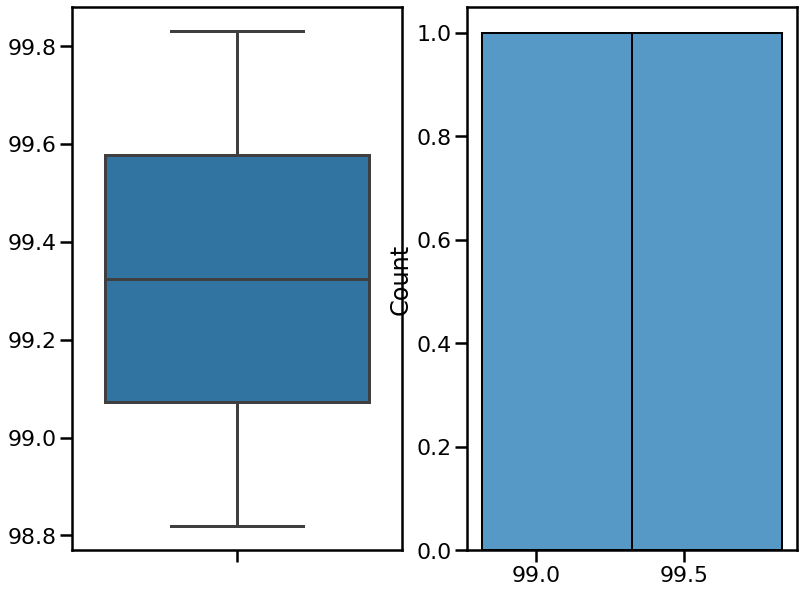

BX.KLT.DINV.WD.GD.ZS


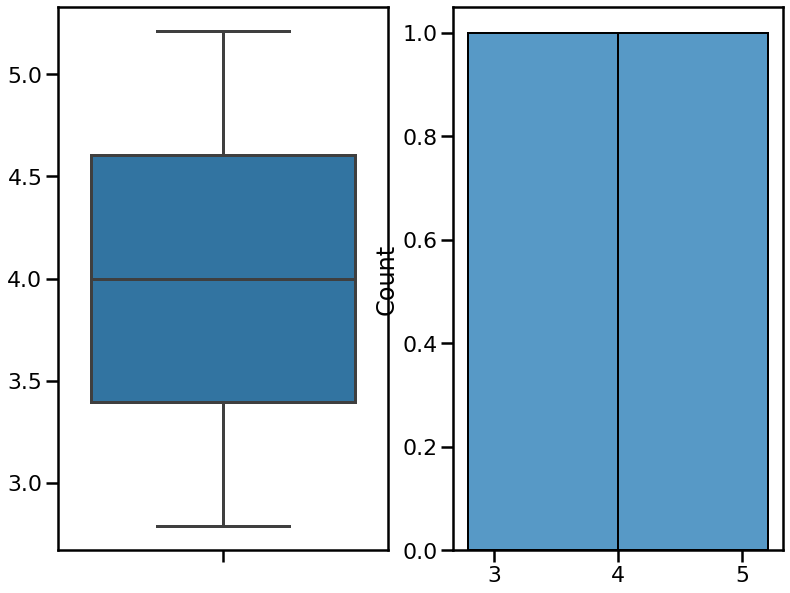

NY.GDP.PCAP.KD.ZG


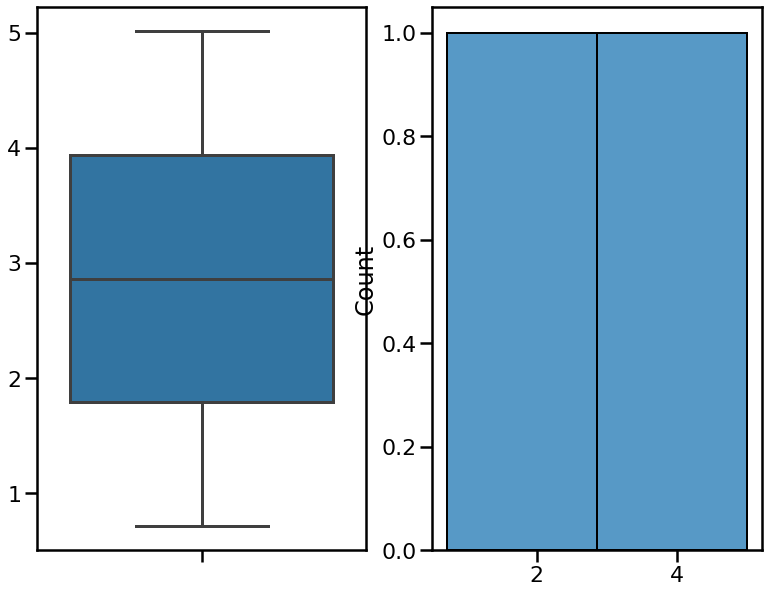

IT.NET.USER.ZS


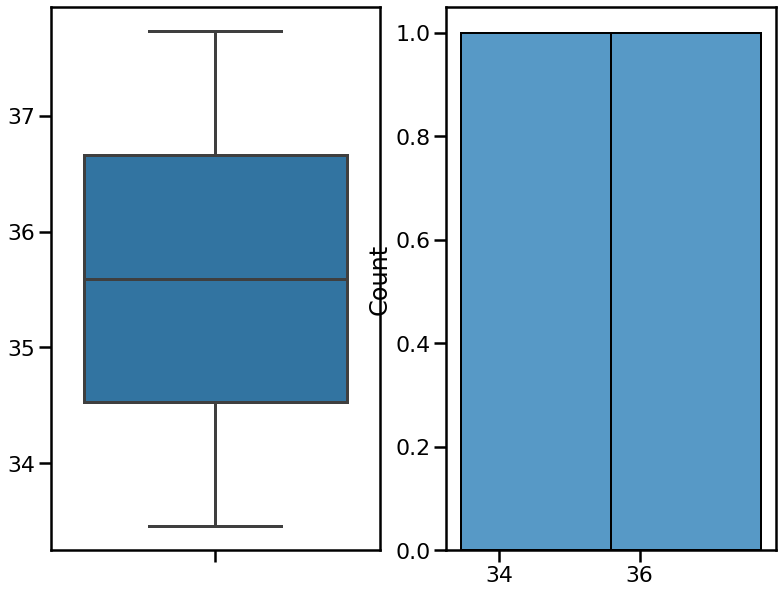

NV.IND.MANF.ZS


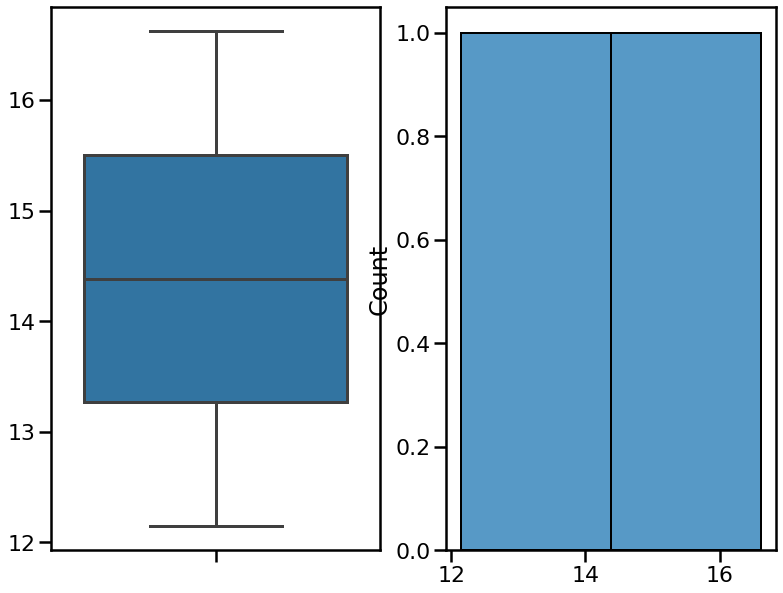

SH.H2O.BASW.ZS


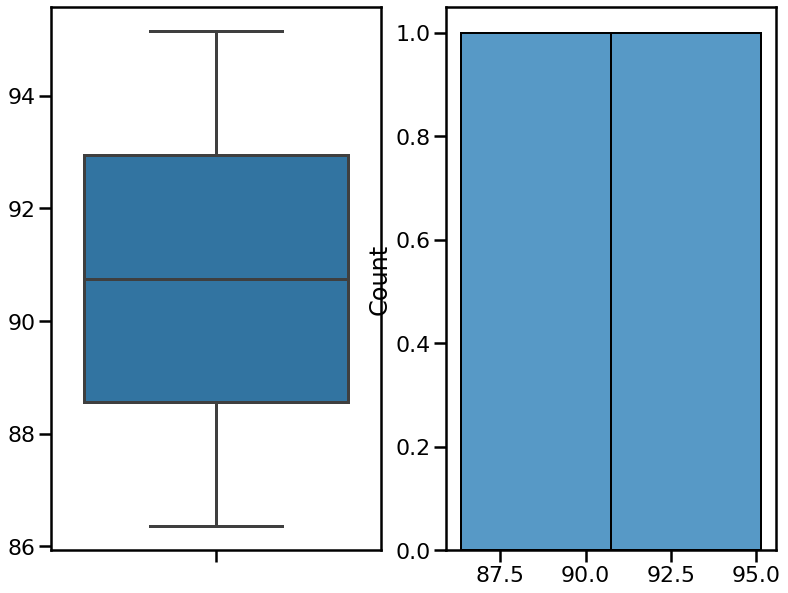

SH.STA.BASS.ZS


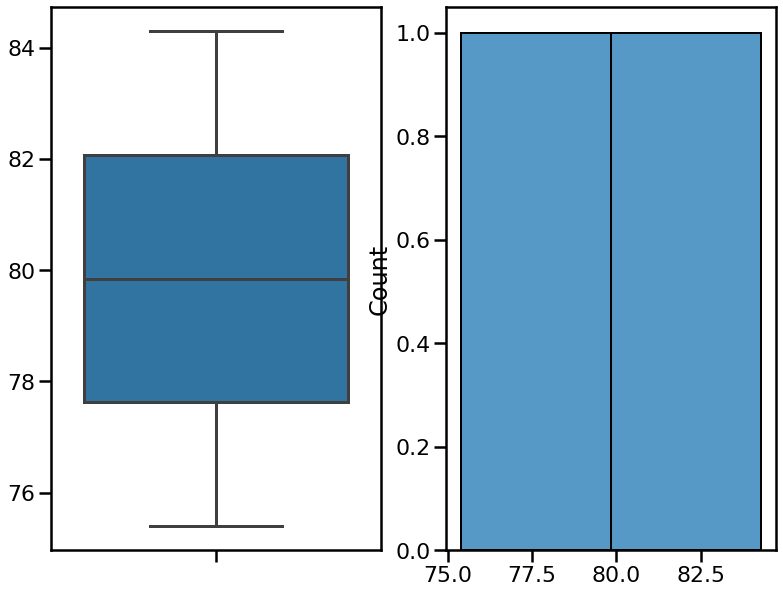

ER.PTD.TOTL.ZS


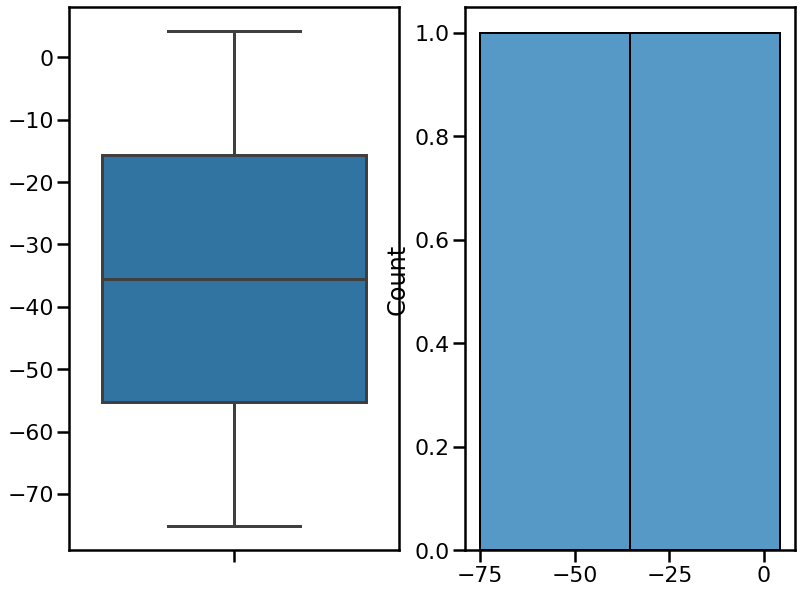

NY.GDP.TOTL.RT.ZS


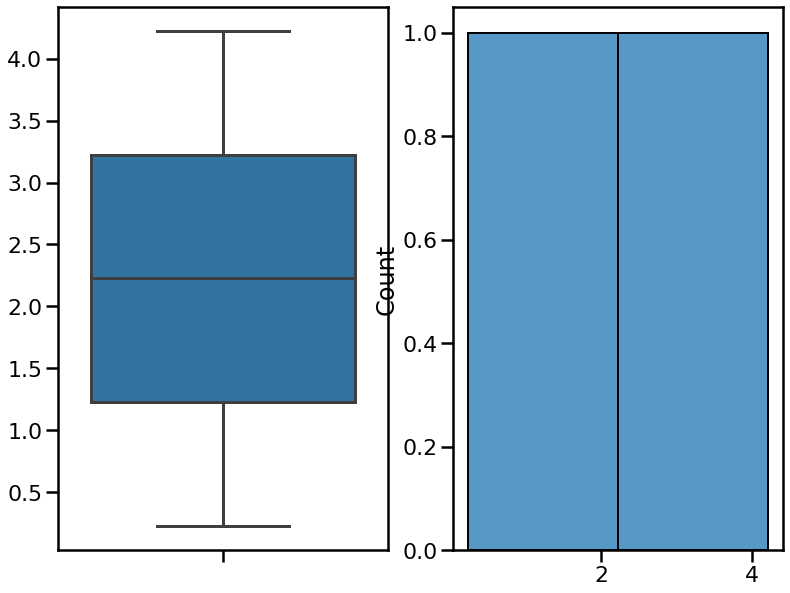

EG.ELC.ACCS.RU.ZS


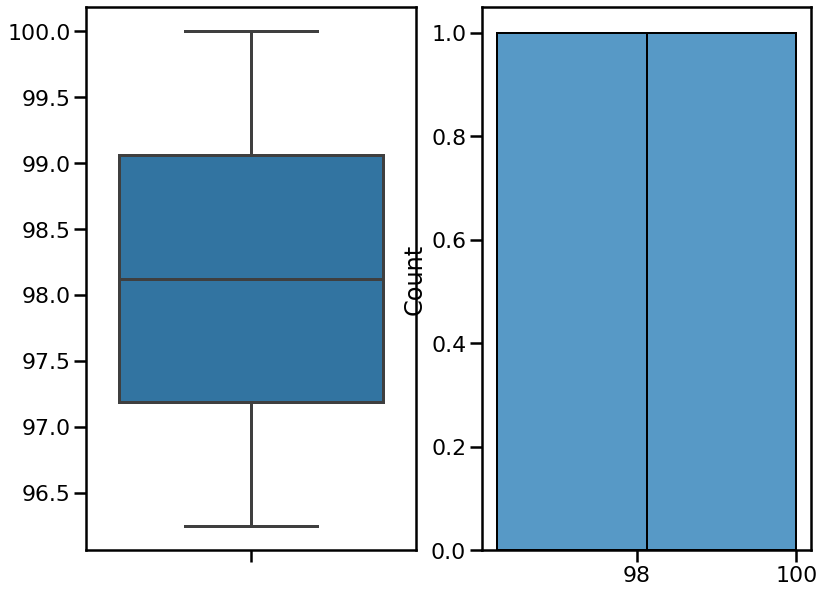

EG.ELC.ACCS.UR.ZS


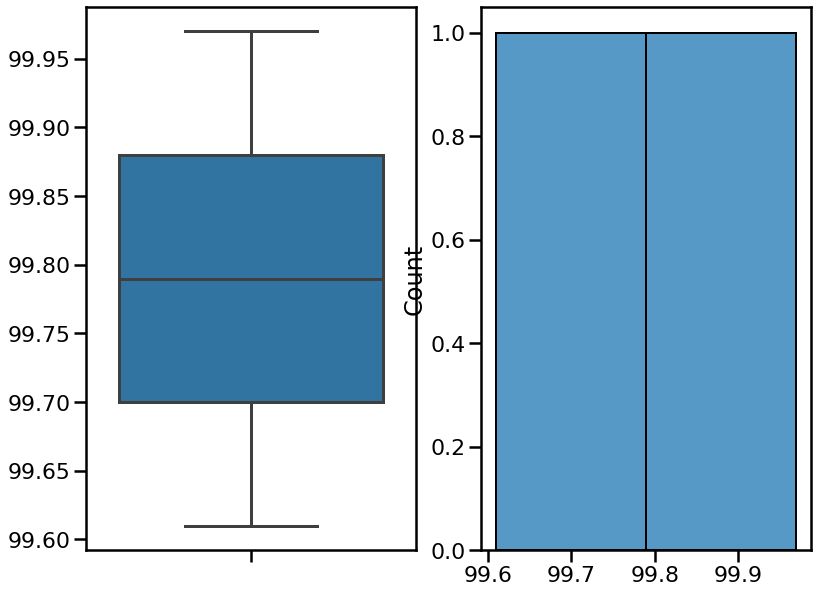

ER.FSH.CAPT.MT


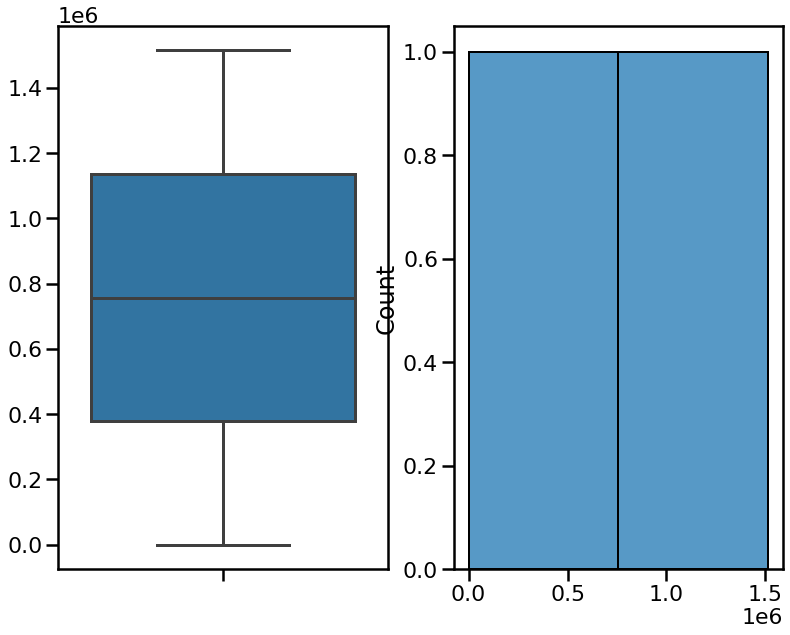

NY.GDP.COAL.RT.ZS


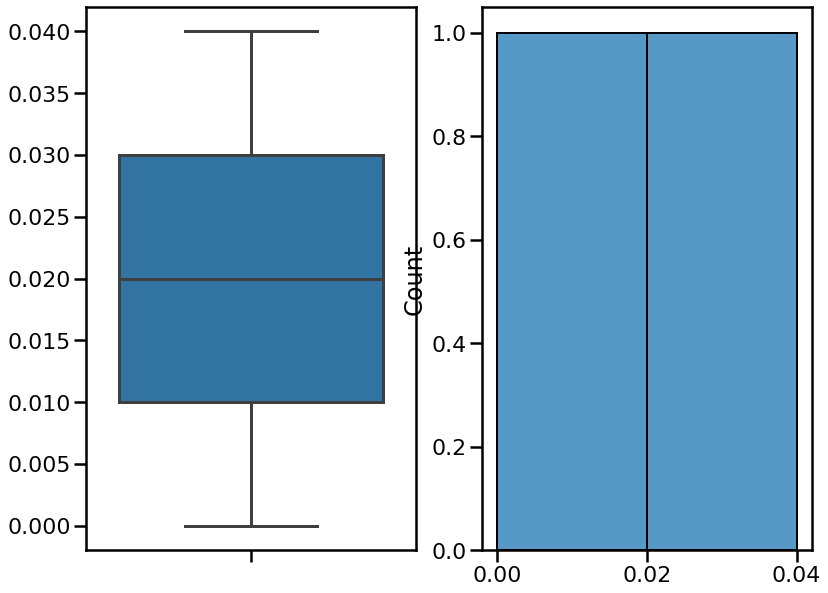

PA.NUS.ATLS


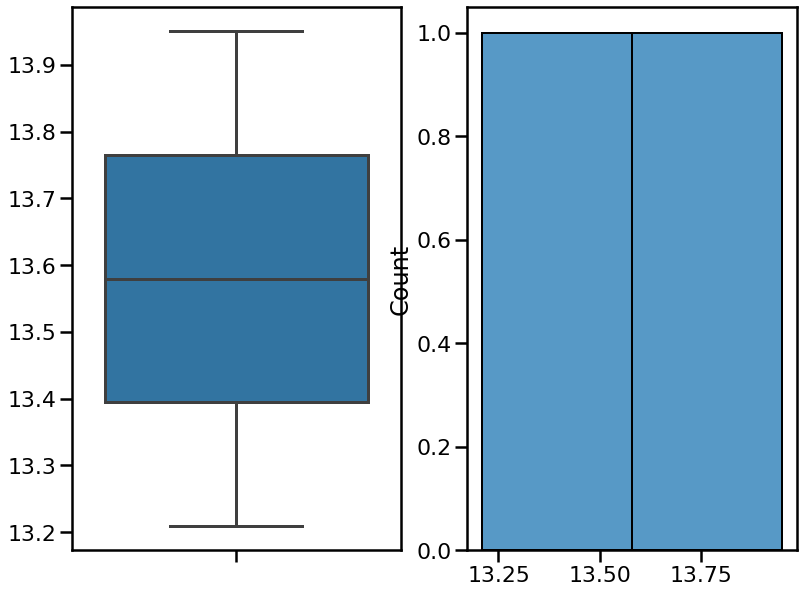

BX.KLT.DINV.CD.WD


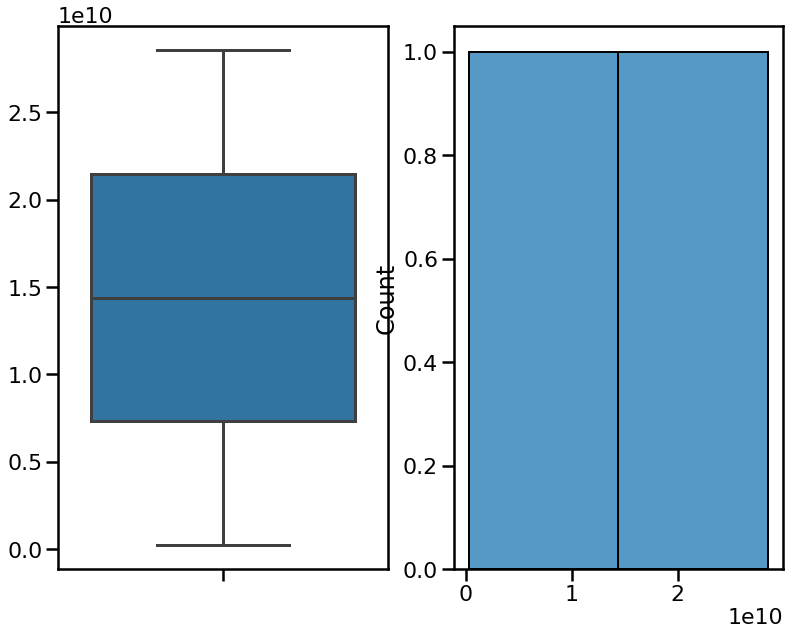

AG.LND.FRST.ZS


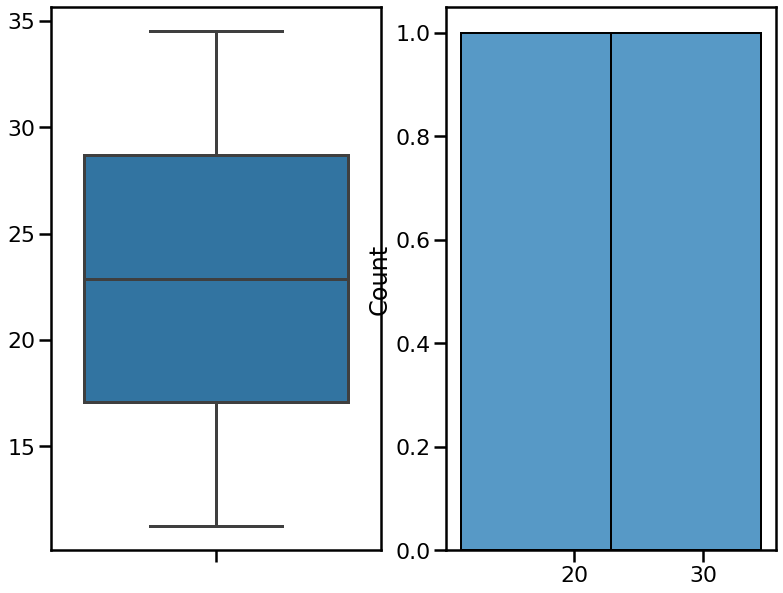

AG.LND.FRST.K2


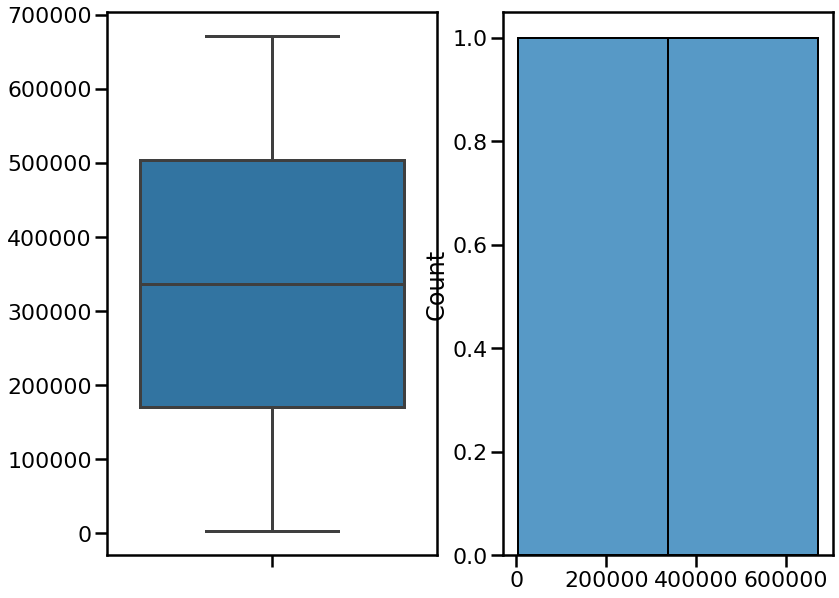

NY.GDP.FRST.RT.ZS


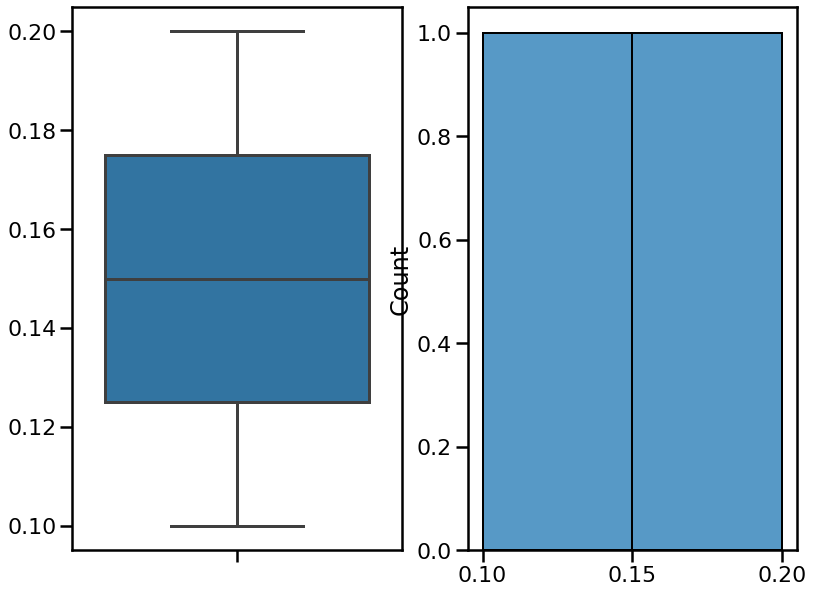

NY.GDP.MKTP.KD


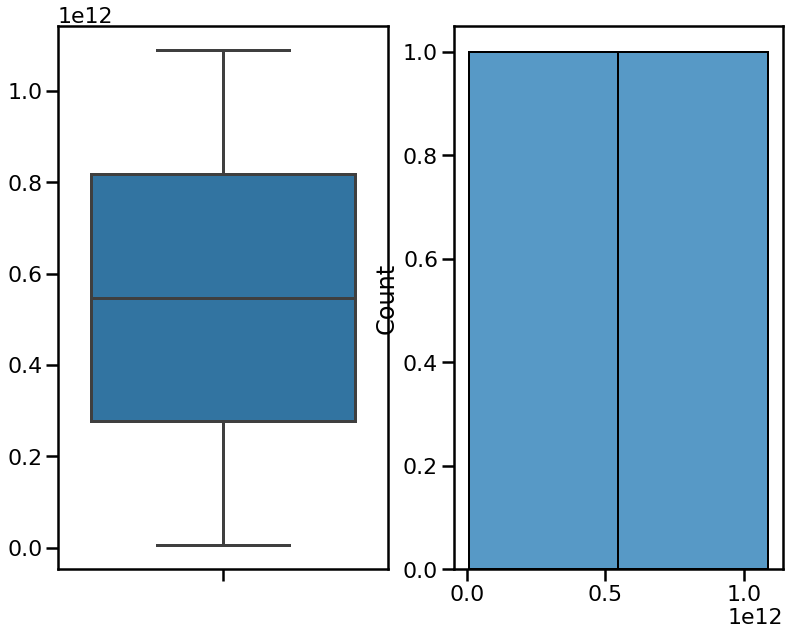

NY.GDP.MKTP.KN


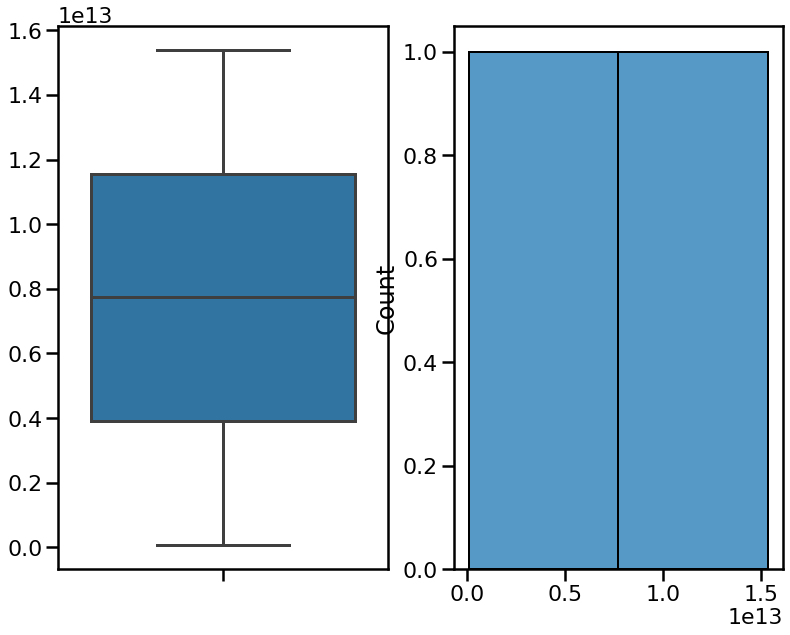

NY.GDP.MKTP.CN


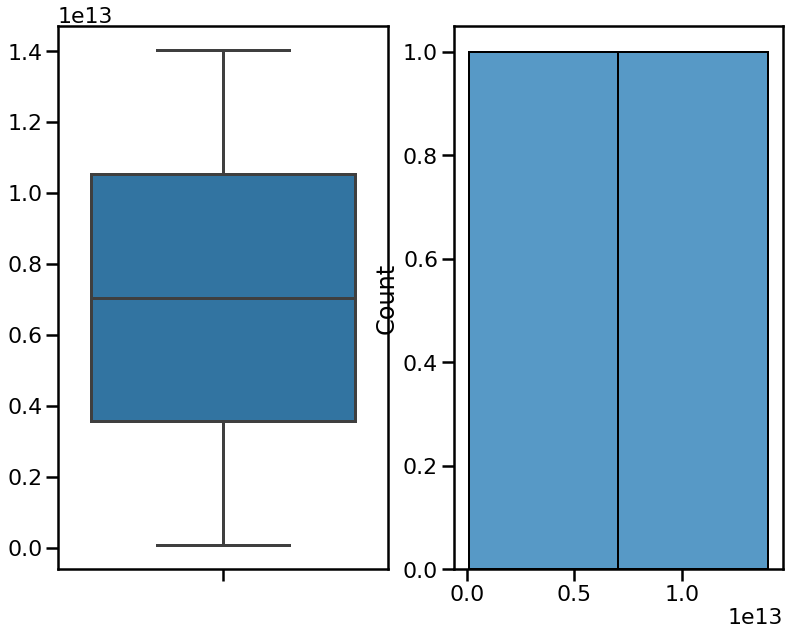

NY.GDP.MKTP.CD


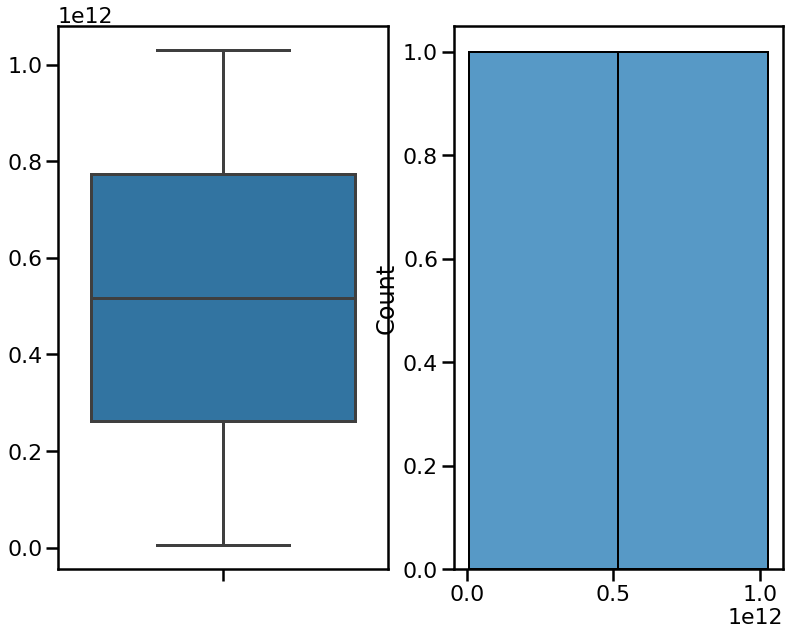

NY.GDP.MKTP.KD.ZG


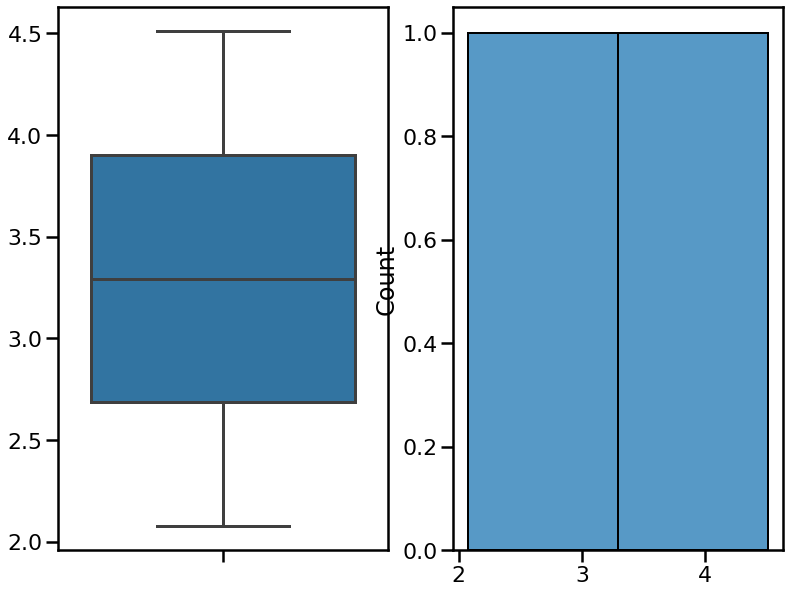

NY.GDP.MKTP.PP.CD


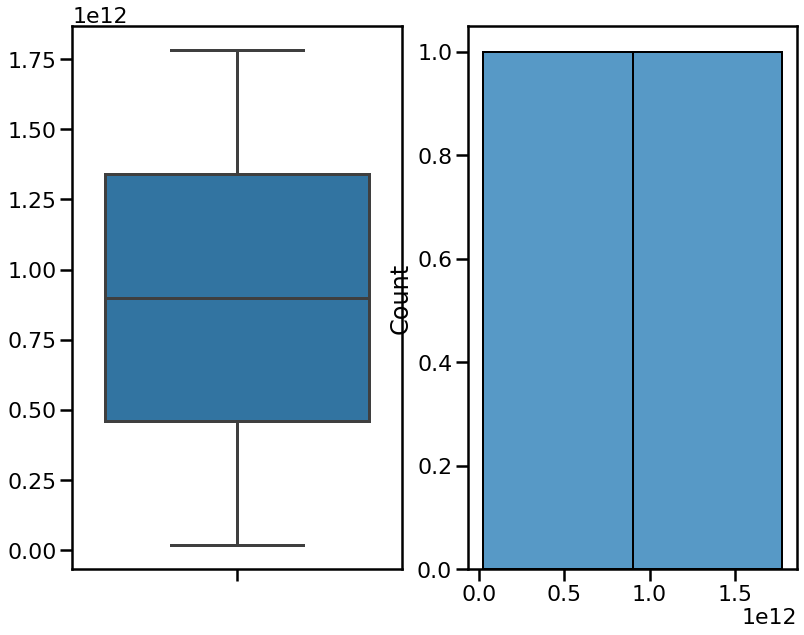

SH.TBS.INCD


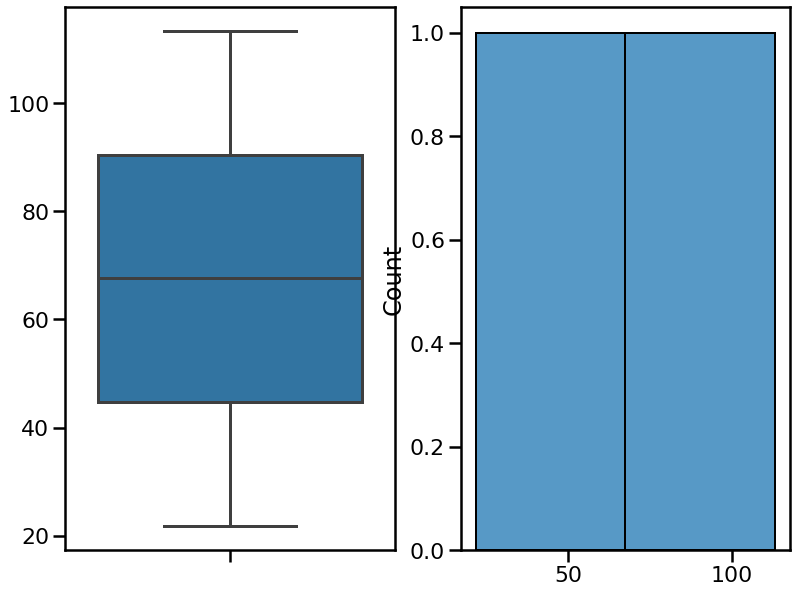

NV.IND.MANF.CD


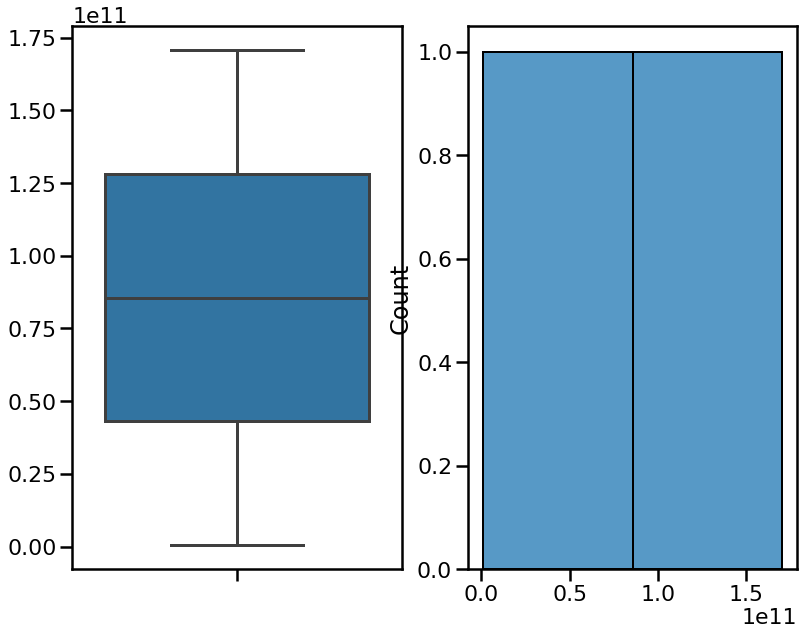

TG.VAL.TOTL.GD.ZS


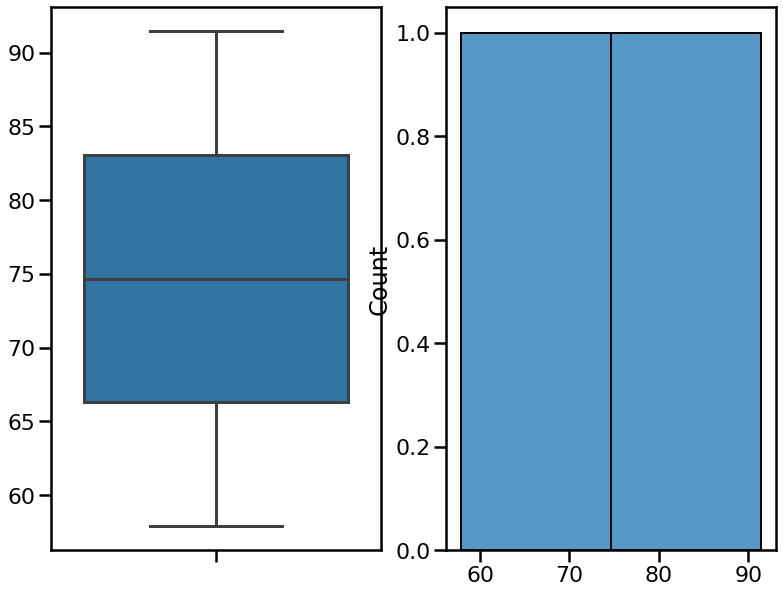

NY.GDP.MINR.RT.ZS


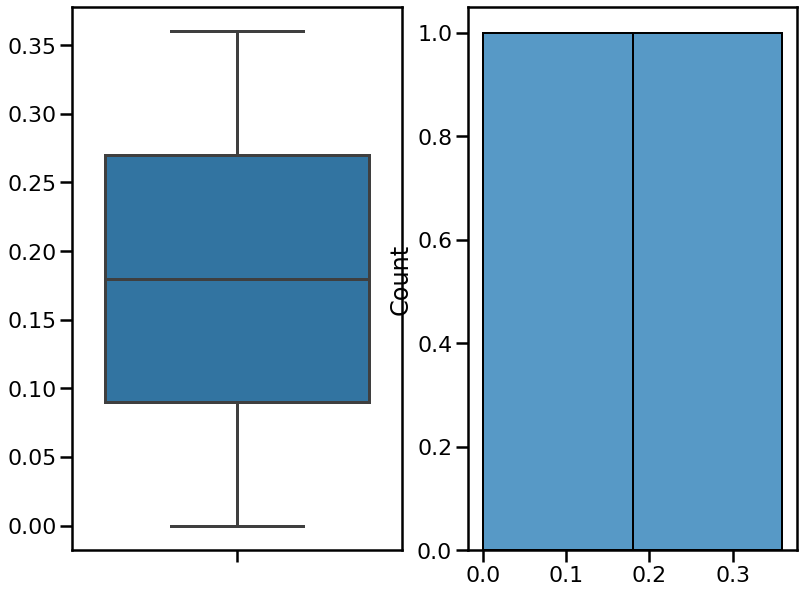

NY.GDP.NGAS.RT.ZS


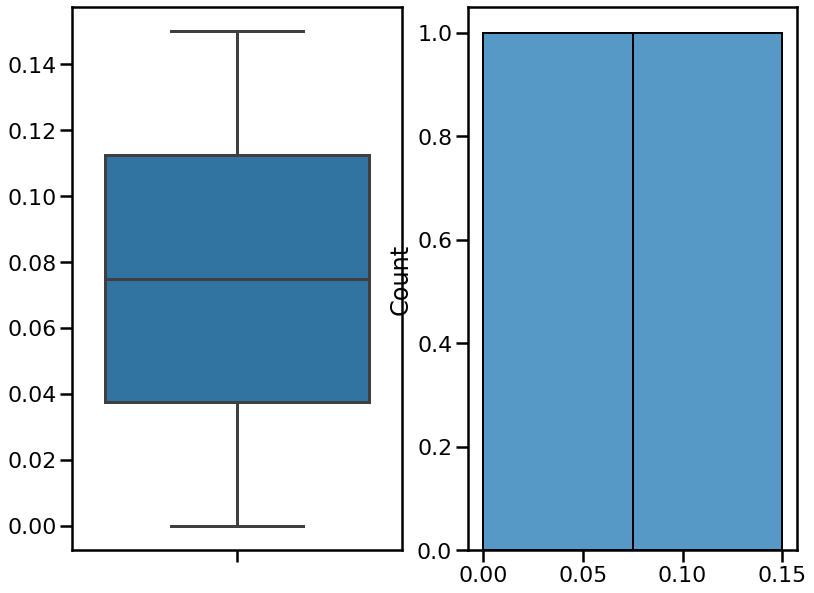

NY.GDP.PETR.RT.ZS


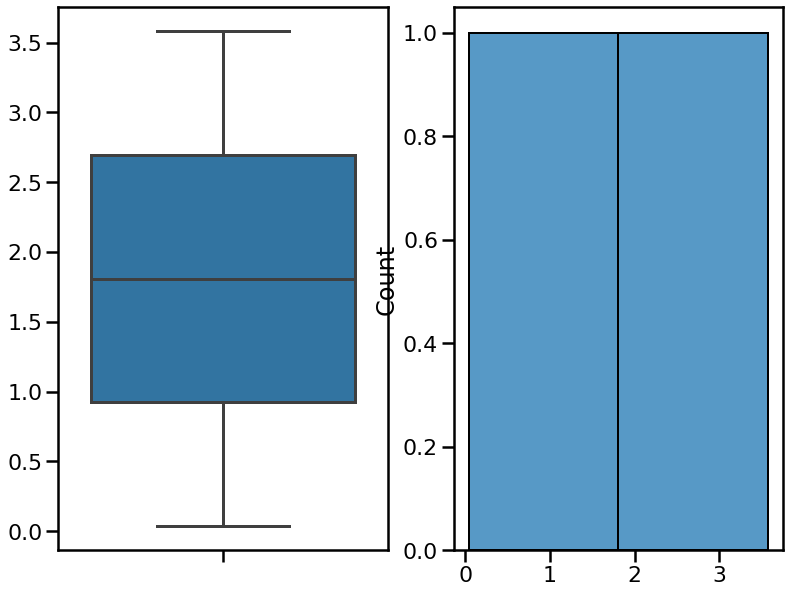

SH.STA.ODFC.ZS


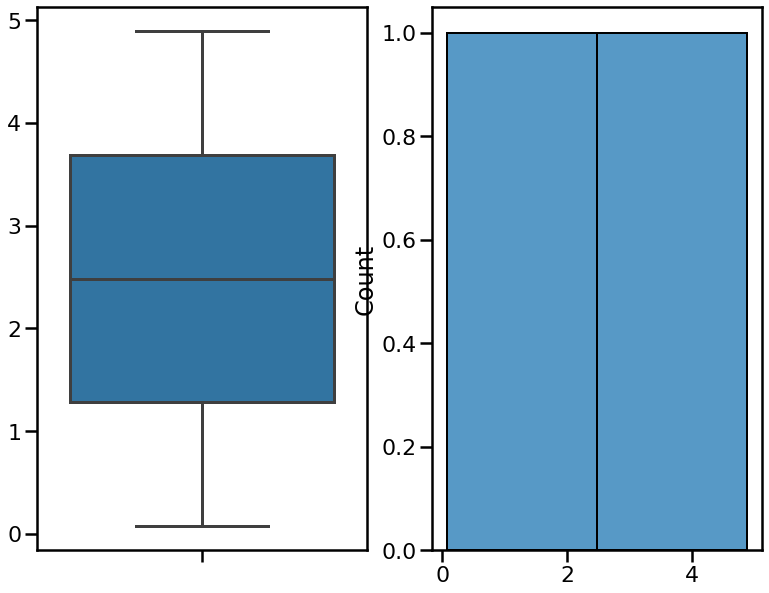

SE.PRE.DURS


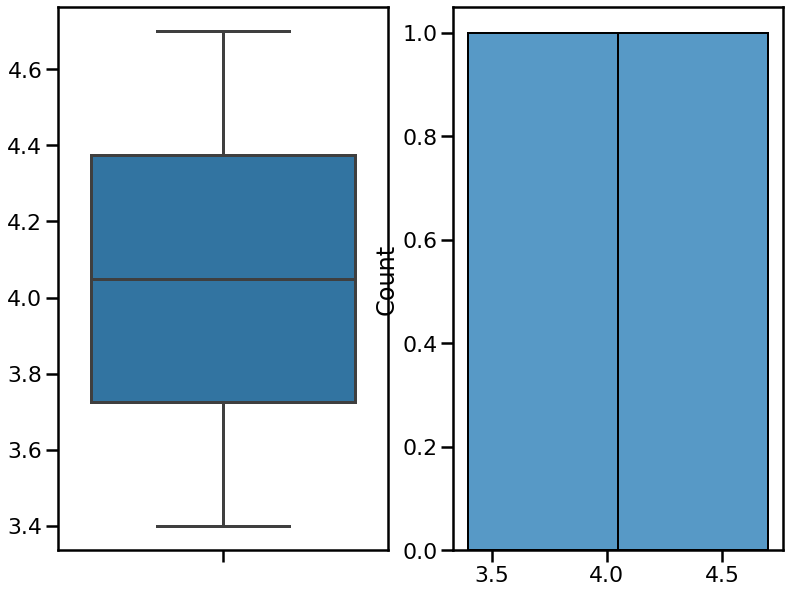

SE.PRM.DURS


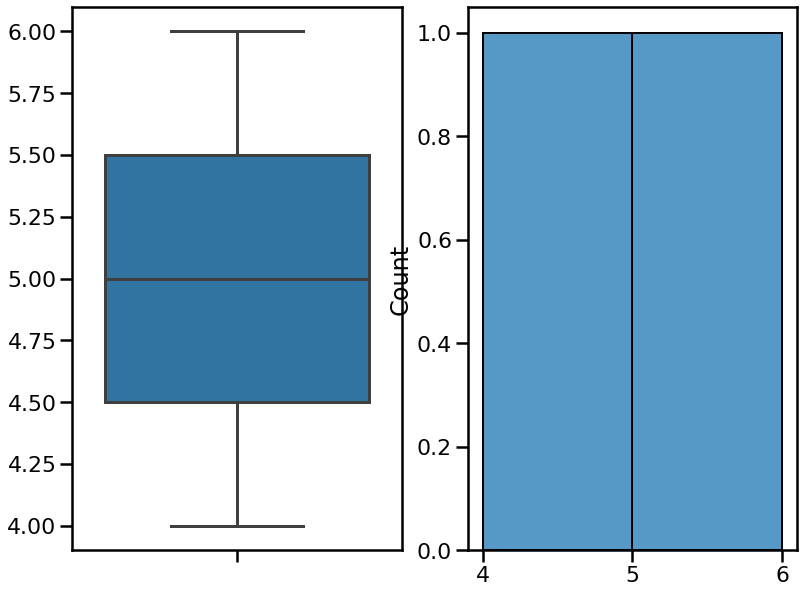

EG.FEC.RNEW.ZS


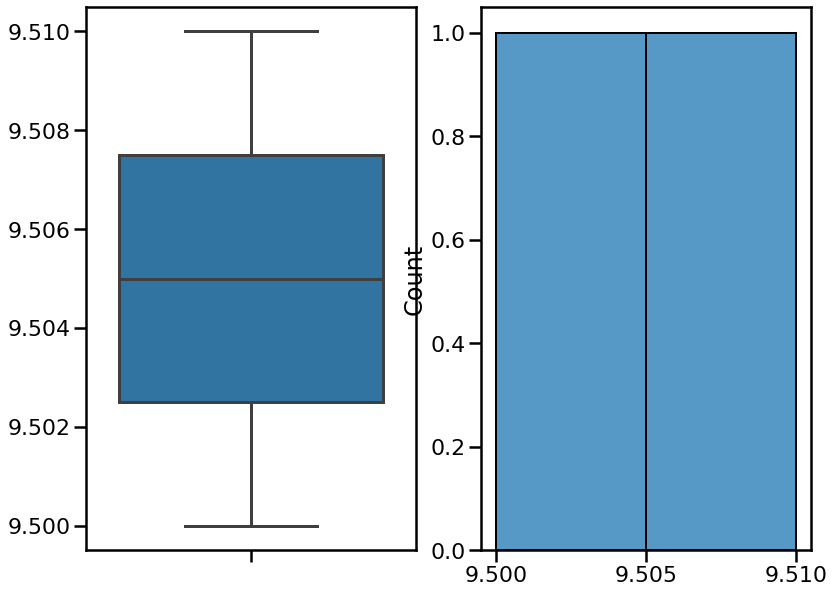

SE.SEC.DURS


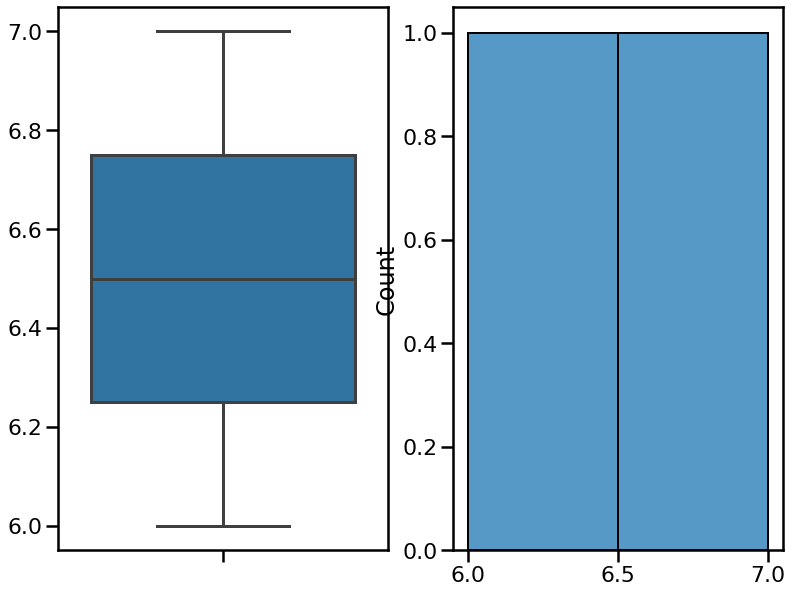

ER.LND.PTLD.ZS


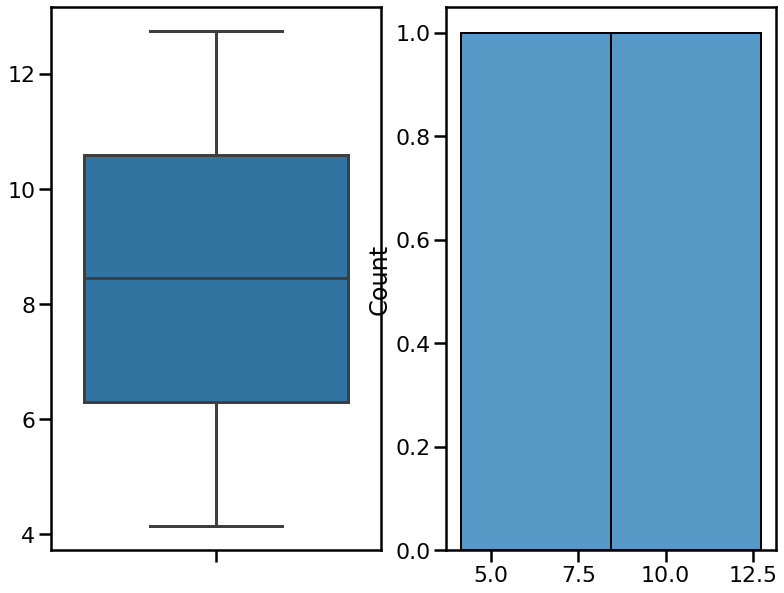

ER.FSH.PROD.MT


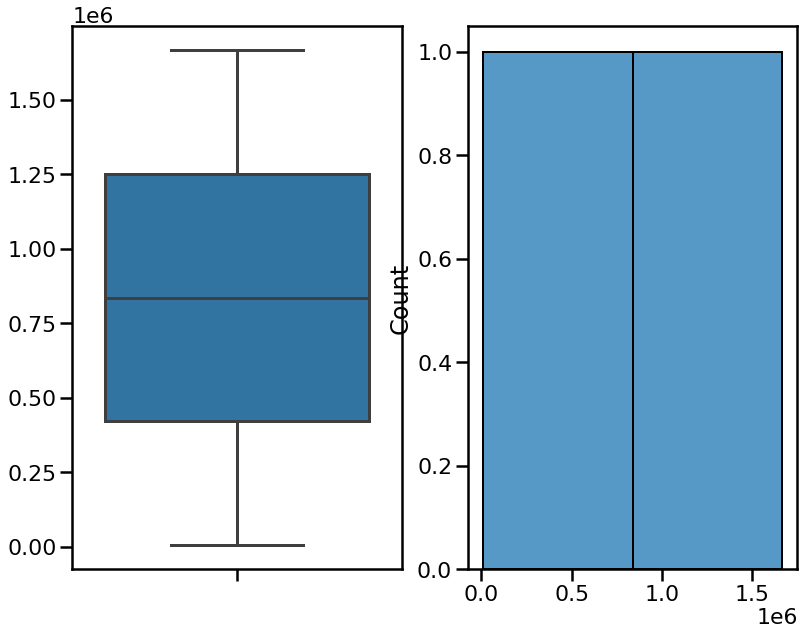

SP.URB.TOTL


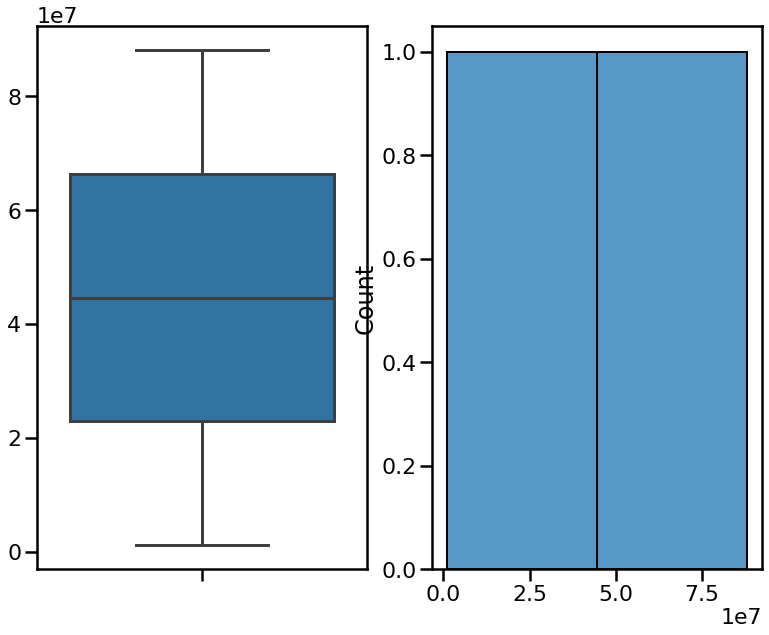

SP.URB.TOTL.IN.ZS


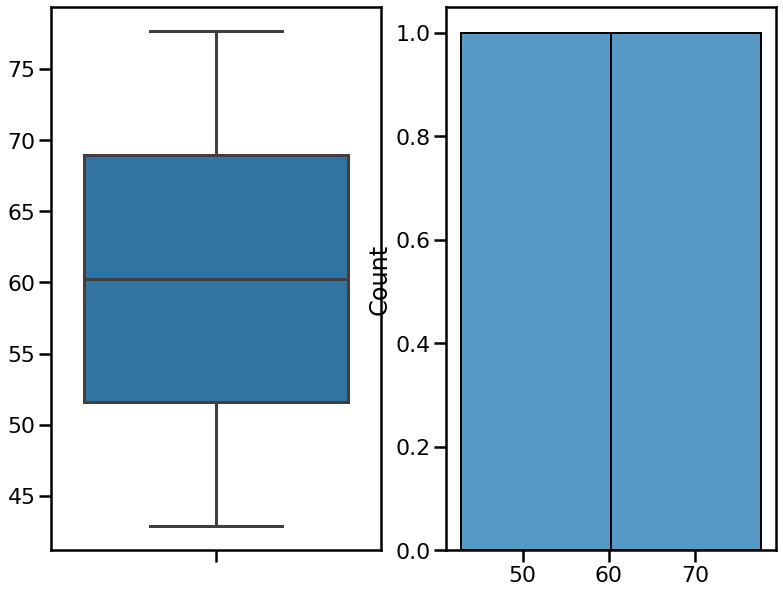

SP.URB.GROW


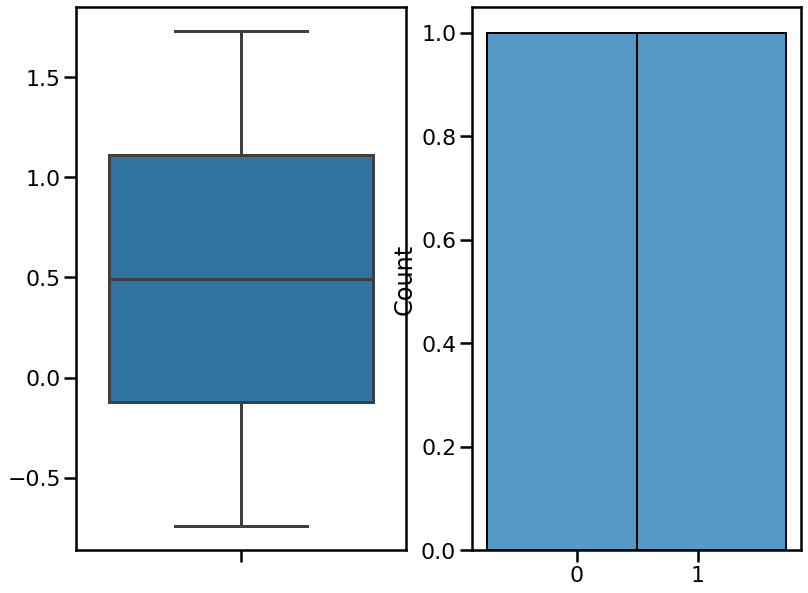

EG.ELC.RNEW.ZS


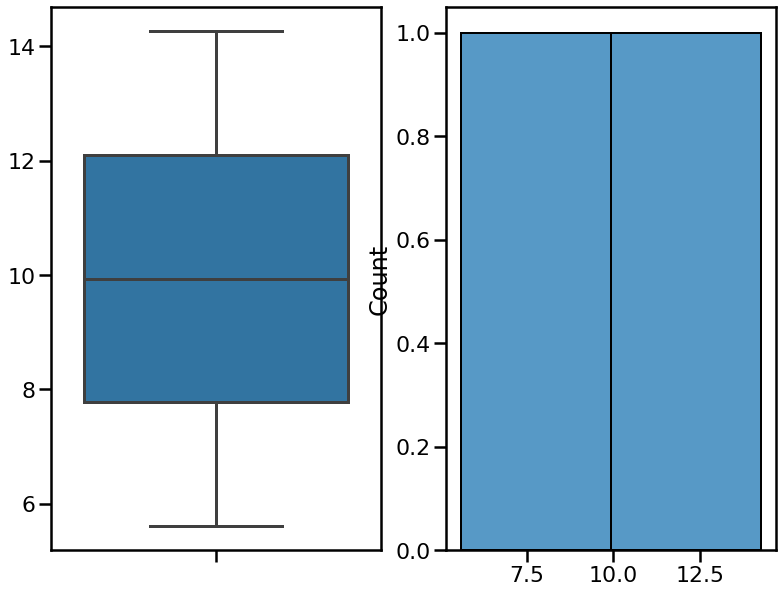

In [123]:

for s in series_to_keep:
  print(s)
  fig,ax =  plt.subplots(1,2,figsize=(13,10))
  sns.boxplot(y=pivot_graphics[s].values,ax=ax[0])
  sns.histplot(pivot_graphics[s].values,ax=ax[1])
  plt.show();